In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [42]:
filename= "/Users/laure/OneDrive/Dokumente/VU/Python for Text Analysis/Final Assignment/irony-labeled.csv"

df = pd.read_csv(filename)
df.head()

#Renaming the columns
df.columns = ["Comment_Text", "Label"]
df

,Comment_Text,Label
0,I suspect atheists are projecting their desire...,-1
1,It's funny how the arguments the shills are ma...,-1
2,We are truly following the patterns of how the...,-1
3,air pressure dropping as altitude goes higher....,-1
4,Absolutely. I think we'd be hard pressed to f...,-1
5,Democrats don't know how to manage money? Sh...,1
6,It's not like automation has eliminated the ne...,1
7,Would he win?,-1
8,Yeah I didn't get far. This article fills me ...,-1
9,Insane like a fox. Ted Cruz is actually very ...,1


In [43]:
print("This Irony dataset entails", len(df), "items")

This Irony dataset entails 1949 items


In [41]:
#checking for any missing values
missing_data = df.isnull().sum()
missing_data

This dataset entails 1949 items


Comment_Text    0
Label           0
dtype: int64

In [84]:
Ironic = []
Not_Ironic = []
for x in df["Label"]:
    if x == 1:
        Ironic.append(x)
    else:
        Not_Ironic.append(x)

print(f"The dataset enails a total of {len(Ironic)} IRONIC comments")
print(f"The dataset enails a total of {len(Not_Ironic)} NON-IRONIC comments")

The dataset enails a total of 537 IRONIC comments
The dataset enails a total of 1412 NON-IRONIC comments


In [4]:
from sklearn.model_selection import train_test_split

In [46]:
y = df["Comment_Text"]
x = df["Label"]

#think this is the right way round.... !! 
#i.e. x = label, y = comment, but we may need to check haha

##double check and see top 5
# print(x.head())
# print(y.head())

In [68]:
#test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#split the training set to get validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=13)

#pandas concat joins series together (i.e. dataframes)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
val = pd.concat([X_val, y_val], axis=1)

print("The Train set entails:", len(train), "items") #70
print("The Test set entails:", len(test), "items")  #20
print("This Validation set entails:", len(val), "items")   #10



The Train set entails: 1364 items
The Test set entails: 390 items
This Validation set entails: 195 items


In [69]:
##Indexing Training - comment
"Comment_label:", train["Comment_Text"].iloc[:4]

('Comment_label:', 544     What makes you think Warren isn't Obama V 2. 0...
 1462    It surprises me that Republican congressmen us...
 976     His favorite color is Coca Cola, he clearly kn...
 372                                     That's hilarious.
 Name: Comment_Text, dtype: object)

In [70]:
##Indexing Training - label
"Label:", train["Label"].iloc[:4]

('Label:', 544    -1
 1462    1
 976    -1
 372    -1
 Name: Label, dtype: int64)

In [71]:
# pandas .shape to see data frame in form of tuples (no. of rows / cols)

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)
print("Validation Data Shape:", val.shape)

Training Data Shape: (1364, 2)
Testing Data Shape: (390, 2)
Validation Data Shape: (195, 2)


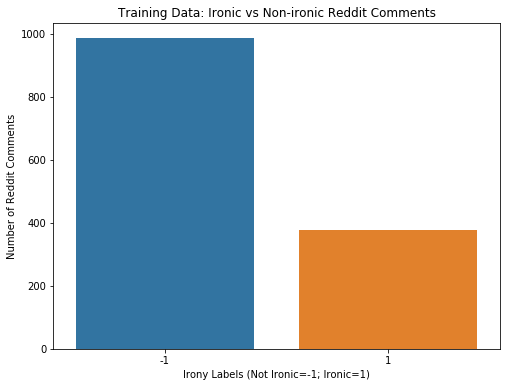

In [72]:
#Summarise the distribution of comments by different labels (1)Train, (2)Val (3)Test

#TRAINING
fig = plt.figure(figsize=(8,6))
sns.barplot(x = train["Label"].unique(), 
            y=train["Label"].value_counts())

plt.title("Training Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

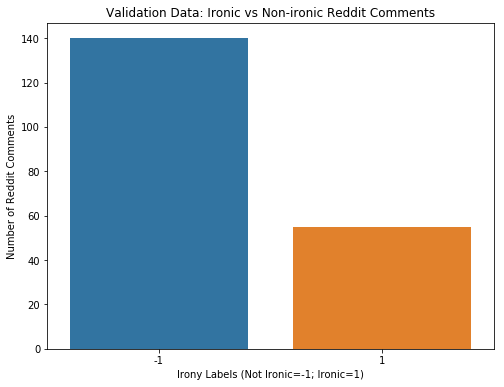

In [73]:
#VALIDATION
fig = plt.figure(figsize=(8,6))
sns.barplot(x = val["Label"].unique(), 
            y=val["Label"].value_counts())

plt.title("Validation Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

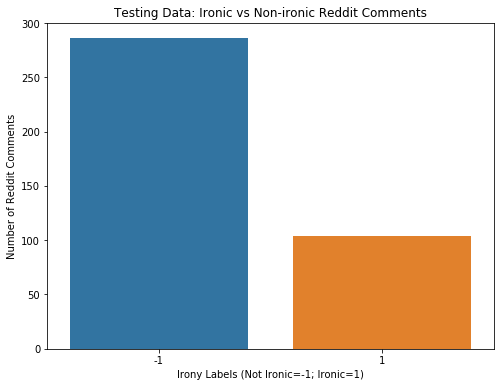

In [74]:
#TESTING
fig = plt.figure(figsize=(8,6))
sns.barplot(x = test["Label"].unique(), 
            y=test["Label"].value_counts())

plt.title("Testing Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [13]:
# #split comments into tokens and add additional column to dataframe
#APPLY SPACY NLP (make each a doc)
train["Comment_Text_Parsed"] = train["Comment_Text"].apply(lambda x: nlp(x)) 


#CODE below overwrites same column, above adds and extra column (choose one)

#train["Comment_Text"] = train["Comment_Text"].apply(lambda x: nlp(x)) 

In [21]:
train.head()

,Label,Comment_Text,Comment_Text_Parsed
488,1,She must have taken the Parsing Graduate Cours...,"(She, must, have, taken, the, Parsing, Graduat..."
586,-1,"""You will be abused. "" Heh heh.","("", You, will, be, abused, ., "", , Heh, heh, .)"
1925,1,I'm going to use this comment without giving c...,"(I, 'm, going, to, use, this, comment, without..."
1533,-1,"Bible says ""fear of man brings a trap"". \n\nYo...","(Bible, says, "", fear, of, man, brings, a, tra..."
1536,1,I saw you driving that car you filthy whore...,"(I, saw, you, driving, that, car, you, filthy,..."


# Okay so now was thinking to take each of the comments out of the dataframe and put into a list

Ofc we need to keep the comments all together still (make bag of words for each? but not entire thing)...

# so not sure if better to keep in dataframe and then we can just add on columns i.e. average word/sentence length for each etc

from this point on i don't know what im doing hahah

In [40]:
wordlist = []
for x in train["Comment_Text_Parsed"].iteritems():
#     train["Number of Words"] = train
    print(x, type(x))

(488, She must have taken the Parsing Graduate Course from Bill Clinton.) <class 'tuple'>
(586, "You will be abused. "  Heh heh.) <class 'tuple'>
(1925, I'm going to use this comment without giving credit to you.) <class 'tuple'>
(1533, Bible says "fear of man brings a trap". 

You can't pastor and be ruled by fear instead of God.) <class 'tuple'>
(1536, I saw you driving that car you filthy whore...) <class 'tuple'>
(640, Awesome scene, but I think it would be much better if she skipped the "I believe in science and evolution" part and went straight into the "I cannot get behind a supreme being who... " Science isn't a"belief" and although some Christians do deny science it is not nearly as common as using religion to justify horrible things and condemn people for not being Christian.) <class 'tuple'>
(941, Dude, try living in South Carolina.  I swear we've had like 1 good news story about us in the past 4 years.  All the rest?  Completely embarrassing.) <class 'tuple'>
(555, As far a

(163, With all the bad crap coming out of Washington...  frankly a speaker that used a few lines from Wikipedia...  really is a circle-jerk waste of energy.   IMHO) <class 'tuple'>
(408, Yes, I've been hearing this bullshit on the radio and TV all week and it's infuriating.  The reason those don't carry over is because they are scams that don't cover shit if you actually get injured.  But no one seems to be talking about that fact.) <class 'tuple'>
(225, Let us be clear here - it is do-nothing Republicans.  I'm so goddamn tired of the 'both sides are equally bad' line.  Total bullshit.) <class 'tuple'>
(1542, Link for anyone in Canada: http://www. thecomedynetwork. ca/Shows/TheDailyShow? videoPackage=139123) <class 'tuple'>
(1000, It does nothing to assist the political discourse of this nation to characterize democrats as the "enemy. ") <class 'tuple'>
(1697, You should do a post on your past experiences on navigating without health insurance and then your experiences on the ACA proce

I bet a million dollars that if it was a Republican president pushing conservative minded justices, there would be no opposition whatsoever.  Ideological balance?  Fuck them.) <class 'tuple'>
(69, Correction: Rand Paul's speech writer plagiarizes off Wikipedia.  You all really think politicians these days write their own speeches?  Hah!) <class 'tuple'>
(1820, Upvote away.  There is no virus.  Mods label sites they think are 'biased' with unacceptable domain, which strangely enough included largely liberal leaning websites.  There is no virus, and the article is fine.) <class 'tuple'>
(902, Okay...  I want to get back to reading this man.  I'm feeling so spiritually apathetic lately, but back when I was reading The Great Divorce, Screwtape Letters, and Mere Christianity, I didn't feel like this.  Is there some online resource anyone could recommend?  Or even just a complete list of his works?) <class 'tuple'>
(1443, I think we are just going to see more republicans in general, Spanish,

It's terribly irritating.) <class 'tuple'>
(558, what the hell is wrong with ending white privilege? or employment rights for trans* people? 

And by "disallow critical assessment" of evolution I bet they really mean "don't want creationism taught as scientific theory. ") <class 'tuple'>
(418, [Walmart isn't the only company to have asked its underpaid employees to donate to feed each other. ]( http://m. pghcitypaper. com/pittsburgh/blogs/Post? basename=upmc-opens-food-bank-for-struggling-employees-misses-point-completely&amp;day=11&amp;id=Blogh&amp;month=12&amp;year=2012) 

UPMC, supposedly a non-profit hospital system, has done the same thing for a while now.) <class 'tuple'>
(115, When right wingers whine that the USA has some of the highest corporate tax rates in the world, I remind them that these "rates" are like the manufactures suggested retail prices for mattresses...... nobody actually pays it, everyone gets a special "sale" price.) <class 'tuple'>
(1319, Here's the definitio

I agree youth ministry must not become a golden calf, but it absolutely exists because of the way culture has designed itself.  It is human person to human person relationship in Christ.  It is not to be just one more problematic segregation in the church, but just because we give it a name doesn't mean it has to something other than just "ministry. ") <class 'tuple'>
(1070, The list used to be populated by oil companies, then car companies and now its shifted towards tech.  The gold-rush industry of the 21st century.) <class 'tuple'>
(160, Let's eat popcorn and watch the Teahadists tank the Republican party into oblivion the next election cycle.  The political mileage from this kind of stuff will haunt them for decades.  "Remember back during the Teahadist days...? ") <class 'tuple'>
(1686, I think it's a bit presumptuous to assume that getting rid of one of our two parties will lead to anything good.  

Please recall that a new party or parties is no more likely an option than just h

Every time one of them tells me about big government my immediate retort is "yes, big government *is* a problem; they are in my *cooch* and in my bedroom" shuts them up right off.) <class 'tuple'>
(445, The ACA website is a 1000 times better than the Republican IDontCare. gov healthcare website.) <class 'tuple'>
(982, Why would you buy this, and what would you do with it?) <class 'tuple'>
(624, I am just hoping he will get center to right Catholics to think.) <class 'tuple'>
(874, &gt;“We explore how neuroscience and religion should inform and enrich each other,” 

Getting that nausea feeling right about there... 

&gt;“As a neuroscientist, I know that the human mind has a material basis, and that may cause even more cognitive dissonance for people

OK, so he's an atheist? 

&gt;One of Klemm’s goals for the course is to show students that science and theology don’t have to contradict each other. 

So this is a course in apologetics.  Must be a dirty word since he doesn't mention it. 



Less of a list of quotes that show he was ahead of his time.  More of a lot of repetition of previous philosophers/theologians, a collection of meaningless phrases, and a single progressive thought.) <class 'tuple'>
(1361, We could solve poverty in this country easily if we wanted to: With a [universal basic income](http://en. wikipedia. org/wiki/Basic_income).  

It's an idea worth spreading, so tell a friend (or ideally, lots of friends).) <class 'tuple'>
(1331, It ruined Paul Ryan's childhood because he's still a very confused little Eddie Munster.) <class 'tuple'>
(453, Wisconsin here.   Yup, our esteemed Governor is quite proud about kicking 92,000 constituents off of Medicaid.   The base, some of which are directly effected, continue to cheer.   After all, they must find some other positive aspect of the agenda Walker was given, since the jobs plan has been shown to significantly stifle job growth.) <class 'tuple'>
(295, Each day I feel the distance between me and any religion in

(1052, Nah instant 1950's tax rates.) <class 'tuple'>
(1293, This is now officially my favorite novelty account.  [slow clap]) <class 'tuple'>
(192, Modern Conservatives and their mentally challenged cousins, libertarians, take their Austrian Economic ideology as doctrine, and would run with it until it drove the entire country into a backwards feudal state.  The last moderate Republican president we had who realized we had to spend or cut spending, or tax or cut taxes when it was necessary was George Bush Sr.  Because he didn't embrace the unpatriotic philosophy of "TAXES ARE THEFT DURP" the loons on the right abandoned him and lost what should have been a fairly easy reelection (the guy was an incumbent who won and finished a large war for God's sake)

Democrats have their own ideologies, but they realize when going against their ideology can be sound economic policy (payroll tax holiday as a recent example).) <class 'tuple'>
(562, You know, if my daughter were in a similar situation

(911, Do you really think they owned anyone?   Someone was having a bakesale and other people went full retard.) <class 'tuple'>
(398, A chuckle-worthy irony.) <class 'tuple'>
(95, Best idea EVER!   Could you imagine if scientific industries and scientists got the same ridiculous tax breaks as your average Kansas church?) <class 'tuple'>
(1453, Warren "surges" to 7 percent support vs.  Clinton's 61 percent.  Biden at 11 percent. 

I absolutely love Senator Warren, but come on...  this title is more than a bit premature.) <class 'tuple'>
(1910, When you've seen how angry and violent the religious groups are, it makes sense to want no association with them.) <class 'tuple'>
(577, I wouldn't say it's terrorism, but it IS extortion.   And it's not democracy.   

Recall Congress!) <class 'tuple'>
(1232, Impossible.  Obamacare kills jobs, I heard it on the talky and the picture box.) <class 'tuple'>
(525, LOL silly USA.  There are lunatics on the streetcorners but you shouldn't make them Maj

Vermonter here.   Good luck to us in maintaining the necessary levels of tax revenue to effectively fund a model single payer system when we have the oldest population in the U. S.  (and growing in numbers) coinciding with watching our 20 and 30 somethings leave Vermont to pursue job opportunities and business opportunities out of state.   It's unsustainable when our younger people are leaving the state to expect those few who do stay to support those who need healthcare the most.    Without a younger workforce attracted by a diverse and strong in-state business climate to warrant their residence, who will to shoulder the tax burden for those who use healthcare the most?   I'm curious to learn if the law and program will be challenged under the equal protection clause since the benefit of single payer protection may not extend to those who pay into the system but are not offered single payer benefits due to being offered health insurance through their employer.   The Governor and the V

But with that said, I can't wait to see how this pans out!) <class 'tuple'>
(1734, They want the government shut down and they want the Republicans to bear the responsibility.    The MSM will do their best to make sure that happens.) <class 'tuple'>
(212, For the same reason mega churches are popular, and you keep hearing about a new, no investment needed real estate plan or method on the radio. 

Greed is easy.   Giving and caring is hard.) <class 'tuple'>
(933, &gt; Our focus school and our Superintendent’s mandate that we improve education for students of color

Then teach them what a damn sandwich is!) <class 'tuple'>
(1092, This Massachusetts liberal did so much harm to the Conservative cause it isn't even funny.  He single-handedly allowed Obama and the socialist party to move the Overton window so far left that real conservatism isn't even recognizable in the public discourse. 

Our only hope is the grassroots support of real, conservative, American Patriots like Ted Cruz to pul

Hopefully this response is helpful to readers that actually want to understand what Blackstone and other institutional investors are doing, rather than just shake their fists and yell "Damn Wall Street, Republicans, and Obama! ".   There was a lot of anecdotal malarkey at the end of the article which is where I stopped reading.) <class 'tuple'>
(779, At first I thought you meant the shape of the highlights.) <class 'tuple'>
(410, You do realize that most of the current job lose is actually because of technology right?   Automation has killed more jobs than any other factor out there.   It is the giant elephant in the room that no one wants to address because everyone loves technology but it is simple fact. 

http://www. technologyreview. com/featuredstory/515926/how-technology-is-destroying-jobs/) <class 'tuple'>
(38, &gt; If there are other laws that do, that has nothing to do with Obamacare. 

You should read the article.  Second paragraph:

&gt;The 1993 National Voter Registration A

(739, I got one of these this morning.  The kid and mother handed it to me with about five words spoken.  "We're distributing these to everyone" was the extend of the conversation.  They weren't at all interested in discussing anything.  Weird.) <class 'tuple'>
(1067, I'm surprised they  discussed it in a positive light.) <class 'tuple'>
(1486, Ten years later and we are still at war and no safer than when we started.   The NSA's unprecedented overreach of authority was born of this administration.   It doesn't matter if he thought he was doing right at the time, he was wrong and we continue to pay the price for that.) <class 'tuple'>
(1199, They're piggybacking off the U. S.  in 2 ways that make their system work. 

1.  They rely on the U. S.  to provide their defense for them, freeing up resources to pay for their social programs.   Were those countries required to provide adequate defense for themselves, you'd see quite a few of their social programs be thrown over the side. 

2.  T

Seriously, those who agree with Mr.  Hersh - what news source is your beacon of truth?   What organizations and people are the standard bearers that the rest of the "pathetic" media should aspire to be?   I really want to know, because this type of bullshit generalization is a cheap and empty tactic.) <class 'tuple'>
(486, I think this is just one more way that the media tries to belittle atheists.  Who tries to pretend the person they're angry at doesn't exist?  Children.) <class 'tuple'>
(1077, Well I've heard that Mexicans and Blacks smoke it and then want to rape white women.   

It'll also be detrimental to the cotton industry...) <class 'tuple'>
(962, They're kind of out there.  But they managed to *shut down out government. *) <class 'tuple'>
(1648, Can't argue with that logic) <class 'tuple'>
(1252, Me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me m

(357, I wish Governor Jindal was a better candidate.  Smart, decent record, and a great personal story; but he sounds like a ninth-grade shop teacher half the time.  That state of the union response speech in 2009 was a damned catastrophe.) <class 'tuple'>
(1119, You know actually think Audi Murphy was cool though.) <class 'tuple'>
(1881, Even though their support is at an all time low, their press coverage, and funding, will not be.) <class 'tuple'>
(388, All you need to do these days is get your income defined as a return on an investment.) <class 'tuple'>
(1526, I read Maddow pointed this out and that was all that was said (by anyone major that I can see).  However, I've heard him bring it up 3 times now.  So the fallout is on him on this one.  He needs to learn to keep his mouth shut.  I will NEVER understand why the hell the people in my state elected him.) <class 'tuple'>
(1727, Operation Christmas Child. 

I remember going with my youth group all the way up to Minnesota to sort 

http://singularityhub. com/2013/02/13/watson-is-now-commercially-available-set-to-help-doctors-treat-cancer/) <class 'tuple'>
(568, Garfunkel and Oates are amazing.   "Sex with Ducks" is another fantastic takedown of religious stupidity.) <class 'tuple'>
(301, I won't believe the GOP is dead until I see that they have been landslided away in the elections.) <class 'tuple'>
(943, I once was a Young Earth Creationist because that is what I thought was the most literal understanding of the Bible.  Struggling with the text for many years I eventually changed my opinion upon reading Genesis Unbound by John Sailhamer.  Through this book I came to acknowledge that the meaning of Genesis 1 is not as clear as I once gathered.  Therefore I am now a respecter of many views though holding to a form of Old Earth Creationism myself.) <class 'tuple'>
(642, From the article:

&gt; While there is a possibility that this administrator would have similarly overreacted had the employee worn a George W.  B

Further, the gospels themselves are structured and have many motifs that were meant to appeal to Gentiles (to the extent of downplaying Jesus' Judaism).) <class 'tuple'>
(708, The health deductible tripled due to ability of health insurers to now charge 3x more for skin bronzers -- ziiiiinggggg, see what I did there) <class 'tuple'>
(1030, 6% of American's clicked the wrong button.) <class 'tuple'>
(273, I like his boldness, but he still comes across a little... uncomposed is the word that comes to mind.  But maybe that's what we need right now.  We need to get angry.) <class 'tuple'>
(312, That's a good point.   The shutdown did that enough already.) <class 'tuple'>
(194, Quite frankly, it was Obama that made me independent.  I'm embarrassed to say I voted for him, and I'm not alone in saying that.  I've never voted Republican, and I don't support blocking the ACA like they are, but it's going to be several election cycles before I get duped into voting for another Democrat. 

Aaannnn

(1333, It would make too much sense to connect all major US cities by rail.  I think that the Airlines and car companies would lobby heavily to make sure this never happens.  Looking at which cities the Highspeed was supposed to connect, it seems it was destined to fail.) <class 'tuple'>
(93, Note that all are from secure pockets of uninformed, low information voters who won't likely face any significant re-election threats.  Also note the with the exception of Bachman, few of these Tea Party frosh are known much beyond the backwater districts that they misrepresent. 

More to the point, it is an absolute failure of leadership for John Boehner to be led by a brass nose ring by this small group of malcontents.  [It is not at all clear that he would even lose his Speaker position if he openly told this group to fuck off. ]( http://m. motherjones. com/politics/2013/10/how-john-boehner-could-lose-his-speakership)) <class 'tuple'>
(778, I mean if Obama can win one...) <class 'tuple'>
(1596,

(1530, I bet a lot of people do not know about this..) <class 'tuple'>
(626, As minority populations grow in Texas, Republicans solidify their position as the anti minority party.   They really don't think about the long term do they?) <class 'tuple'>
(1780, He's still on the air?) <class 'tuple'>
(1416, Don't they need it the MOST?) <class 'tuple'>
(506, Soooo... yeah.  Conservatives....  racist homophobes.   :O) <class 'tuple'>
(1438, It's bad, approval among black Americans has fallen to a “staggering” 93. 6%.) <class 'tuple'>
(917, Yep this sure is a Republican Shutdown  
/sarcasm off) <class 'tuple'>
(321, The Eddas don't really...  work that way. 

The closest we really get is the "Hávamál", [which is more a set of guidelines than actual rules. ](http://upload. wikimedia. org/wikipedia/en/b/bc/Barbossa_Skeleton. jpg)) <class 'tuple'>
(28, I for one am in utter shock that these fine institutions would stoop to such a low level to deceive consumers and benefit themselves financiall

(1713, There's nobody to sue.  The entity that is guilty of wage theft is the temp agency, some fly-by-night whose only assets are a couple of telephones and maybe a desk.  Laws *could* be written to allow the real employer to get hit for theft of wages...  but they haven't been.) <class 'tuple'>
(720, Yeah I'am voting chris christie over clinton.  He has fresh ideas when it comes to education and he has this tell it straight persona, dislikes the tea party too.) <class 'tuple'>
(196, lol, that's one big massive steaming pile of r/shitpoliticssays) <class 'tuple'>
(1661, Yes, keep running that interference...) <class 'tuple'>
(146, I wish that they would point out that the misogynist guy was also misandrist; "a culture of immodest women is by necessity a culture of uncommitted men".   I'm no dog who has to to chase every piece of meat in sight just like a woman isn't a sexual good for consumption.) <class 'tuple'>
(1480, Crap.  FICA is more than SS payouts, so even if FICA goes straigh

So, they are not saying, "give me everything in your house or Im going to burn it down," they are instead saying, "give me everything in your house or I won't douse it with my water.  Its mine and I dont have to give it to you. " It is NOT right, and most will consider it tantamount to the same thing, but Im trying to explain that it is a very *carefully strategized* tactic to give them an out from responsibility.) <class 'tuple'>
(1499, Said the paid Hilary shill... 

EDIT: check out the comments on the article.) <class 'tuple'>
(430, The "American Family Association"... you gotta love it - they represent the American family like Charles Manson and his "family" did...) <class 'tuple'>
(680, I read that in Joey Mousepad's voice, except saying "intragnisent".) <class 'tuple'>
(1571, Last I checked my Bible, a Jewish mob led by the Jewish priests of the time dragged Jesus to the Roman Prefect, Pontius Pilate, and basically told him to either execute the man as a traitor or they'd riot an

(1851, this it what burns my ass about this country,this is still going on and yet we send billions of dollars to all these assholes around the world who hate us!  foreign aid my ass !  lets feed our own first!  now i am all pissed off!  i'm done!) <class 'tuple'>
(1423, Feinstein is a complete tool, any "reforms" from her are likely utter rubbish.) <class 'tuple'>
(180, Yeah, Fuck freedom of religion!  Free healthcare, my employer, that I **chose** to work for, is forced to pay for, is more important than that!) <class 'tuple'>
(1401, Agreed.  Very impressive that he doesn't want to patent it either, guy seems like the real deal.  Honestly though, I wish he would, so he'd have more money to make whatever else he wants to.) <class 'tuple'>
(1459, Not enough natural Ghz for gaming.) <class 'tuple'>
(218, [Kneel, my child... ](http://i. imgur. com/VPt2sxF. jpg)) <class 'tuple'>
(2, We are truly following the patterns of how the mandarins took over empires, not because of the sword, but b

(313, The reason behind it is that party talk turns into a blame game and it divides people.  I prefer pointing out specific people who voted for the law rather than lumping everyone together by party name.   Kudos to represent. us for not getting bogged down in that divisive talk) <class 'tuple'>
(151, Wow, thanks for all the context, OP.) <class 'tuple'>
(282, It blows my mind that anyone could be pulling down six figures in a ministry position.  I wonder what the rabbi who forbade his apostles to carry money, food, or an extra change of clothing would think.) <class 'tuple'>
(541, Like one of those edugames?  Sounds good really.) <class 'tuple'>
(4, Absolutely.  I think we'd be hard pressed to find a website that didn't experience some sort of slowdown after getting 2. 6 million or 5 million visits in 18 hours.  Also there are bound to be some glitches when rolling out a program of this scope.) <class 'tuple'>
(1413, Well, to me the immediate problem is that it's faulty to view God 

The conservatives aren't even pretending anymore that this is nothing more than a bold face attempt to steal elections.) <class 'tuple'>
(330, Cheney will live forever, because only the good die young.) <class 'tuple'>
(1585, Both these guys  need a swift kick in the balls.) <class 'tuple'>
(777, Do you think there are democrats that would rather default on the nation's debt than repeal the ACA?   Would you call them out as traitors?) <class 'tuple'>
(1320, You can call me Diamond.) <class 'tuple'>
(1056, Here is a list of voter suppression attempts done by the gopt last election

Early voting
[source](http://www. huffingtonpost. com/2012/08/18/republican-voter-suppression-early-voting_n_1766172. html)

Nine hour voting lines
[source](http://www. huffingtonpost. com/2012/11/04/florida-early-voting_n_2073119. html)

Voter ID laws to combat the umm dozen or so cases
[source](http://www. huffingtonpost. com/2012/09/12/voter-id-laws-minorities_n_1878893. html)

Extreme gerrymandering to ma

Though I'd now surmise that Portland, Oregon might be at 70+ percent.) <class 'tuple'>
(543, It would be nice to be able to explain more about some of the answers.   For example, I'm a Baptist, but Baptists in Norway are theologically more closely aligned to Anapbaptists than Southern Baptists in America.  

(I feel like Southern Baptists often give us a bad name.   They seem to completely disregard liberty of conscience among other things that we stand for. )) <class 'tuple'>
(340, In many places it was just a bad idea though.  For example, the proposed Omaha-Des Moines-Chicago line.  It would barely travel faster than cars, cost more to ride, and cost taxpayers hefty amounts to keep running in the future.  Yes, the federal government was willing to chip in large amounts.  But that doesnt mean Iowa wants to pay the upkeep costs forever after that.  We have too much existing infrastructure that needs repairing before we add another new mode. 

In a lot of areas it just doesnt make sens

The notion of "reformational catholicism" is already inherent in most non-radical Protestant philosophies.   There were, of course, many radicals who sought to continue the reforms in ways that were against the original intent of the Reformers.   These radicals were clearly criticized by these same Reformers, however.) <class 'tuple'>
(120, I agree on principle, as an Illinoisan.   One of my college roommates, at the time, was on Obama's senate campaign, as an intern.   I got to hear all about him and how he'd be a great senator for Illinois.   4 years later, he quits his job before he finishes a single term, which was mostly spent campaigning for President.) <class 'tuple'>
(1241, I don't wish it on America but I honestly think that until generations suffer from a kind of oppression they will do nothing to prevent it.  we had a generation oppressed in this way.  They got tired of it.  They changed things.  They taught their children to understand the importance of that change.  Those 

&gt;There are serious concerns in the Australian community that some of Adeboye’s ignorant, vulnerable congregation will interpret what he is saying ("Same-sex marriage is an anathema to the will of God") to mean that it is ‘god's will’ for them to rid the world of homosexuals.    (See Ref#7,8 and 9)) <class 'tuple'>
(1085, Well it's the only way to stop that awful health care bill that they couldn't stop at the ballot box or in court.) <class 'tuple'>
(1824, The reason they wasn't encrypted was because this was on an online service that allowed people access to their bitcoins whenever they wanted, so the private keys had to always be accessible server-side. 

From a tech point, what they stole is control of the coins registed in the Bitcoin protocol's distributed ledger.  They managed to get the site owner's private ECDSA cryptographic keys and used them to sign a Bitcoin transaction to the thief's own Bitcoin address.) <class 'tuple'>
(1566, Pro-Hilary propaganda.) <class 'tuple'>
(1

&gt;If it does fail, the effect will be historic.  Obamacare will take down with it more than Mary Landrieu and Co.  ***It will discredit Obama’s new liberalism for years to come. ***) <class 'tuple'>
(1651, I get the distinct impression that Jeremy Paxman completely agrees with him.  This is Paxman trying to give him a stage to stand on.) <class 'tuple'>
(613, Hey guys.   Apparently this article meant what it seems and we should all vote it down.) <class 'tuple'>
(239, Maybe because there are more religious people in the world than there are atheists?  And that lower class countries still have a substantial number of "religious"(not really religious, just following the flow) people in them?  Also, since the study also includes people in prison, where a lot of people convert because of desperation, its not really reliable in that sense. 

Oh, shit sorry, I mean, RELIGION IS BAD AND STUFF RABBLE RABBLE RABLLE!) <class 'tuple'>
(961, Conservative response: herp derp Detroit hurr durr) <c

Now I am not directly relating the two, but I do think that in some situations the pressure from the family and community will cause some to keep their secret to themselves and not speak up about it.) <class 'tuple'>
(747, If I'm not mistaken, Members of Congress have constitutional immunity for things done/said on the floor of congress, or while in the exercise of their official duties.  

So, never.  They can say whatever they like, but would have to actually break a specific law in order to be arrested.) <class 'tuple'>
(1742, No she will not look back.  It is almost impossible for people like her to examine there lives and see the errors and mistakes they have made.  She is a true believer and thinks of herself as  god's vessel.  If she is wrong, then her god is wrong.  Michele will go to her grave thinking she did her god's will.  The overwhelming evidence that the world rejects her ideas only servers as proof, to her, of  righteousness.  She is a sad delusional old woman who shou

Since that is their goal, why would they call for anything else?) <class 'tuple'>
(1155, No he just has a brain.) <class 'tuple'>
(449, When did House Republicans declare Jihad exactly?  I must have missed that.) <class 'tuple'>
(59, Governor, how to you reconcile your statement with the linear progression of time?   
Actually from a non-linear, non-subjective viewpoint it's more like a big ball of wibbly-wobbly timey-wimey...  stuff) <class 'tuple'>
(1712, I've given up on most national media outlets.  I stick to my local newspaper for the most part now.  

Too much bipartisan cock sucking and smearing from both sides.) <class 'tuple'>
(1858, &gt; When her group [the Oklahoma Coalition for Reproductive Justice] began lobbying against a Personhood bill by saying it would restrict in-vitro fertilization, or IVF, a legislator who planned to vote for it, said: “Sorry, what’s IVF? ”

Why do American voters allow morons to govern America?   (And no, I'm trying **really really hard** not to 

(886, Is this censorship?   No.   Cowardice?   Yes.   Pathetic?   Yes.   Indicative of a worthless group of shills?   Yes.   Censorship, though?   Not so much.) <class 'tuple'>
(1582, Wouldn't happen.   Self-defense is a valid response to assault claims, and the ethnically-uniform group clearly instigated what went on.) <class 'tuple'>
(1212, I'm not a fan of abstinence education anyway, but assuming you want it to work...  

You know how long telling people *"You'll definitely get an STD the first time you sleep with someone. "* will keep people abstinent?   Right up until they work out that you won't definitely get an STD the first time they sleep with someone. 

You know how long telling people *"You have a four times better chance of a happy marriage if you're a virgin when you get married. "* will last?   My guess is until they've asked a couple of searching questions. 

And saying that *"Condoms are only 95% effective. "* and pretending that's nothing (and the 95% rate seems to c

This kind of thinking is what's wrong with partisan politics, and as a matter of fact it's what's wrong with most religious thinking as well.   "We have all the answers and we're not going to talk you because you're wrong. "  It's so childish.) <class 'tuple'>
(1116, When do we start using the word "Treason" when it comes to these people?) <class 'tuple'>
(1145, This would be a fucking nightmare to have to go through after such a traumatizing experience.  I hope the girl gets a lot of therapy on behalf of the asshole cop who stepped over the line.) <class 'tuple'>
(824, [Kitzmiller v.  Dover Area School District](https://en. wikipedia. org/wiki/Kitzmiller_v. _Dover_Area_School_District), ruled in the United States District Court for the Middle District of *Pennsylvania*, ruled that bringing Intelligent Design into the classroom constituted an endorsement of religion under the [endorsement test](https://en. wikipedia. org/wiki/Endorsement_test) and the [Lemon test](https://en. wikipedia

(1202, This has been the modus operandi of the GOP since Obama was elected - it's time to clear out the dance floor.) <class 'tuple'>
(1315, This needs to go viral.) <class 'tuple'>
(1432, So they waste billions a year that cannot be accounted for **and** penny pinch by pirating software?) <class 'tuple'>
(1563, Now she'll get a book deal or two, and many speaking engagements.  Its always about the money.) <class 'tuple'>
(401, Itchy ears comes to mind. 

The best false hoods are 95% truth and 5% lie) <class 'tuple'>
(1201, Are the people questioning 3d printers because they haven't read the article.  I'm new, but just asking.  I believe in the power of this.  Never underestimate some type of technology.  This happens to be a game changer.  Yes, you heard it here first.) <class 'tuple'>
(1692, Oh look, a right-wing blowhard is talking out his ass.  Must be a day that ends in "y".) <class 'tuple'>
(1360, We could also destroy tax havens, get rid of various corporate tax write offs/looph

But there is hope.  Here's how YOU can change outcomes: register with a party and show up to ALL elections!!  Encourage your state to have open primaries!!  Get off reddit and get out there and sign petitions, volunteer, get your message out.) <class 'tuple'>
(1941, This was what folks didn't understand about the last raise on incomes over $400k (and the Pubbies exploited to the hilt).) <class 'tuple'>
(1732, A smart guy like Bill Nye should know the moon is made of glowy stuff.) <class 'tuple'>
(816, Yeah, that 5 million number seemed wrong.  CA has about 7 million uninsured, so 5 million would be a crazy portion for the first day.   
The guy says that he misinterpreted when someone else told him 5 million.  I'm guessing someone told him 5 million page views and he didn't know the difference between page views and unique visitors.) <class 'tuple'>
(306, Rob Bell does not understand Hebrew syntax.  Grammatically Genesis 1 is written as historical narrative, not Hebrew poetry.  To say t

(184, The thing that worries me about Jon Stewart is a nagging fear that Comedy Central is periodically trying to pressure Stephen Colbert to be more like him in order to appeal to a broader audience.) <class 'tuple'>
(1479, They also view it as a one way street and decry the "war on Christmas" so you know its also bullying christians to disagree with them too.) <class 'tuple'>
(1467, Jesus Christ, she still exists?) <class 'tuple'>
(1569, Gridlock is great when you are an oligarch operating under a corrupt tax scheme with all aspects of government locked in your favor and against the interests of 99. 99% of the population. 

The stupidity of these remaining poor tea party folks is stunning, holding a gun to their own heads to rob the nation blind for the likes of the Koch brothers.) <class 'tuple'>
(636, Yes I would agree their faith is just as earnest as ours, but like the article said, the theology of Mormonism is very different from main stream Christianity and is cleverly worded o

*But then*...  *Richard Dawkins*, uninterested in Hollywood, goes back to the hard facts: he says, "but it's not just Americans they're after [in revenge for foreign policy]: a lot of British Muslims support killing fellow Muslims for leaving Islam"...  they're all caught off guard, Al is like, "ok, so what do we do about it? " Michael Moore is frustrated &amp; get sarcastic &amp; says, "ok, but, so what, should we kill them all? "...  the answer is just use Liberalism; stand by Liberalism &amp; don't be afraid of criticising Islam.  It was like a brief moment those statistics *actually* resonated with people who didn't like them.) <class 'tuple'>
(888, Better yet, don't cap contributions.  I suspect it would add more than 10 years to the solvency.) <class 'tuple'>
(501, Because your bullet doesn't need to agree with a bunch of other people's bullets before it kills anyone?) <class 'tuple'>
(1122, Mainstream America wants Ed Schultz to have a heat attack on camera.) <class 'tuple'>
(19

(1233, I actually heard Greta Van Whatever complaining on Fox (via Colbert) that nobody knew what to do and where to go to sign up.   Lady, that's your actual job.   That's what the news is actually supposed to be doing.   Informing people.   That's like a garbage man not picking up the trash for month and complaining that there's too much trash everywhere.) <class 'tuple'>
(714, Happy Veterans Day!) <class 'tuple'>
(650, She's batshit crazy and has already reversed her position.  Source:wral, on the reversal.  Source on batshit crazy is widely held opinion in NC.) <class 'tuple'>
(1419, It's amusing to me when atheist try to convince me that paying taxes is what God meant by helping the poor.  If they're especially ignorant they will say something like "Remember how Jesus said to Render unto Caesar...? ") <class 'tuple'>
(743, "the environment" ...  another strawman) <class 'tuple'>
(7, Would he win?) <class 'tuple'>
(96, [What am I missing here? ](http://www. biblegateway. com/passag

Just a thought) <class 'tuple'>
(901, The doctor who wrote this article provides several heartbreaking examples of her past patients that show the emergency room solution is no solution at all.  

FTA:

&gt;... the Emergency Medical Treatment and Labor Act (EMTALA), which states that hospitals with emergency rooms have to accept and stabilize patients who are in labor or who have an acute medical condition that threatens life or limb.  That word “stabilize” is key: Hospital ERs don’t have to treat you.  They just have to patch you up to the point where you’re not actively dying.  Also, hospitals charge for ER care, and usually send patients to collections when they cannot pay. 

The disregard of the poor by the likes of Cruz is shameful.   It is past time for a universal system.) <class 'tuple'>
(213, From now on, Waco should be pronounced "wacko. ") <class 'tuple'>
(756, [deleted]) <class 'tuple'>
(1148, Ok, I only have one x chromosome...  but *I* feel patronized.) <class 'tuple'>
(1

The cost of healthcare in America is also a different discussion.   Healthcare is more expensive here because we pay geometrically more for the same services.) <class 'tuple'>
(255, Can this be true? 

&gt; We don't have to wonder whether a health care system built on capitalist profit-seeking is more efficient and less expensive than those in which the government exercises more control.  There has been a test running for decades, with many developed countries doing it one way, and the United States doing it the other.  The results couldn't be clearer. 

---

&gt; On almost any criterion you can come up with, the government-controlled systems work better.) <class 'tuple'>
(1095, What if you believe that the fundamentalists are doing damage the word of Christ by driving more and more people away from the message?   It may not be my job to judge others as that is for God alone, but I really, really struggle with loving those that hate in a way that says this is not right and others shoul

The GOP is like a bunch of airline passengers who think the plane will crash because the flight attendant is a little late in handing out the duty free menu.) <class 'tuple'>
(1482, The problem is that Republican messaging on health care is easy for Americans to digest: "just don't reform it".   The PPACA is a major improvement that was sorely needed as a starting point for universal coverage but things like "we need to get rid of your garbage sham insurance so you can get better and cheaper options" are too complicated to message.   

This country's voters only want to be told what they want to hear, and they want to hear messages that aren't longer than a sound bite.   So long as this is true, conservatives running on a platform of "keep things the way they are" will have an advantage.) <class 'tuple'>
(540, "If I like your plan, you can keep your plan.  Period. ") <class 'tuple'>
(1545, Just when you say to yourself, "I'm not sure republicans could get their heads any further up the

TL:DR Fuck you America.   Get your shit together.) <class 'tuple'>
(1631, Obama was supporting known terrorist organizations and spent two weeks lying about the nature of a terrorist attack.  Even *after* it was known the Administration was lying they continued with the lie until they couldn't any more.  

Why Obama hasn't been impeached over Benghazi, or a multitude of other equally serious scandals, is beyond me.) <class 'tuple'>
(252, When you know your religion is wrong and that you spent your life getting on your knees for no reason, you too would resist.) <class 'tuple'>
(1263, Considering it's a net loss for humans, yes.) <class 'tuple'>
(1838, I love how they show the pictures of the items they are talking about.   You know, instead of just using visually entertaining stock images that are vaguely related.) <class 'tuple'>
(709, The Antichrist, by Nietzsche would be perfect.  I took it to my Philosophy of Religion class once, and got railed at by a couple students.  Oh, such fu

(1075, I think that there's a difference between preaching and the incitement of violence.  And if there's violence, it won't be God's will - it will be his.) <class 'tuple'>
(1231, &gt; “We need to move on and take whatever we can find in the debt limit. ” 

Holy shit, do these guys not learn?  "Hey I pissed on the electric fence over here and it just about blew my dick off, but hey, I bet if I piss on it over *there* something else will happen".  Fucking idiots.) <class 'tuple'>
(1915, Wow, if you got fox news there is no mention of this.  

Fox news does not even talk about the shutdown anywhere on their site.   
The closest they come they say something called a slim down, but that makes no sense.   So fox news is ignoring the main political story right now about the shutdown.) <class 'tuple'>
(1555, MyFace, the first offline social network) <class 'tuple'>
(1835, Same here.  The verdict is as sad as it is predictable.) <class 'tuple'>
(1947, Does anybody remember during one of the 

The younger generation should clue into that and react extremely to what has been going on.  Wake up, make noise and start fucking voting in the millions.  And right fucking now.) <class 'tuple'>
(1433, So it's the same policy toward illegal aliens.) <class 'tuple'>
(1703, well, your calender compactor belongs in the trash compactor.) <class 'tuple'>
(309, Stay in school, kids.) <class 'tuple'>
(62, I also don't think it is a "secret" per say.....) <class 'tuple'>
(1679, So Obama's failure is that he didn't get the right progressive in congress to pass the right laws?  That's a pretty poor argument for the extent of presidential power...) <class 'tuple'>
(244, Yup!  Don't know why more Christians don't follow this.  

Oh, wait,  its not hateful and it doesnt further their agenda.) <class 'tuple'>
(381, I hope he's more set to go nuclear then the last time he said he was set to go nuclear.) <class 'tuple'>
(20, That just makes me cringe.   Not sure if it's the use of memes to try to app

After all the shouting back and forth between Team Red and Team Blue, we're all going to look up and realize that there are guards at the door, bars on the window, and cameras on the walls.) <class 'tuple'>
(394, Another poll found that most people believe water to be wetter than fire.) <class 'tuple'>
(1242, If I had a ton of money I'd turn this into a commercial and have it run in prime time over and over and over) <class 'tuple'>
(260, It's not hypocrisy to accept the monopoly when it's a monopoly.  Sure, he would prefer that surgeries were less expensive and the government wasn't involved, but right now that's the only option.) <class 'tuple'>
(1722, Educationists...) <class 'tuple'>
(1281, A lot of people don't realize that there are more options than just a single payer system.  A single payer system would be something like the UK or Canada has, but other countries provide near universal coverage through other means.  France and Germany still have many private health insurance co

In [32]:
# for row in train["Comment_Text_Parsed"]:
# print(x)
#     #train["Number of words"] = len(comment)

# #train

Is it just me, or is the idea of ANY judge, at any level, deciding any case before them based on there own personal viewpoints utterly ridiculous?  A judges decisions should be made entirely on the facts and arguments presented to them on a case by case basis.  The bench is not a place for judges to inject there own views, political or social or religious or anything.  Judges bought and paid for by either political party or big business is what is undermining the very principals this country was founded on and looks to be destroying any future this country has.


In [30]:
# #METHOD ONE (out of dataframe to list):
# xx = train['Comment_Text_Parsed'].values.tolist()
# gg = set()

# for x in xx:
#     gg.add(x)
# #     print(x, type(x), "\n")
# gg

{Nah instant 1950's tax rates.,
 I'm still protesting the teaching in schools of Heliocentrism as perpetrated by the convicted fraud and known huckster Galileo.  If Geocentrism was good enough for Jesus then it's good enough for me.,
 [deleted],
 I love how they at the end, they pull out a stuck Hummer.,
 Yep he had lots of flaws fortunately being a bad sci-fi writer wasn't one of them.,
 This guy is poisonous.  An idiot with barely passable video production skills.  Why the hell is anyone listening to his bullshit?,
 This is now officially my favorite novelty account.  [slow clap],
 If you're not Catholic it's unlikely you care what the Pope says.,
 Believe me, I was furious when our "socialist" (I can't roll my eyes at that hard enough) president took single payer off the table before anyone even had to ask him to take it off the table.  We should have nationalized healthcare like every other civilized nation on the planet, but apparently my fellow Americans just don't want it.  They

In [ ]:
#METHOD TWO:

# doc_comments_list = []
# for comment in train["Comment_Text"]:
#     doc_comments_list.append(comment)
    
# #each comment is now a DOC and has been put into a list - just to check:
# for comment in doc_comments_list:
#      print(comment, type(comment), "\n")

In [16]:
#this follows from taking OUT the dataframe

#average word length
# wordlist = []
# for comment in list_of_comments:
#     print(comment, type(comment)) 
#     leng = len(comment)
# #     wordlist.append(comment)
# # print(wordlist[:5])

# print(leng)



In [17]:
# xlist = []
# for comment in list_of_comments:
#     for sent in comment:
#         sent = sent.sents
#         len_sent = len(sent)
#         xlist.append(len_sent)

# total = sum(xlist)
# leng = len(xlist)

# average_sent_length = total / leng
# print(f"Average Sentence Length: {average_sent_length}") 

NameError: name 'list_of_comments' is not defined